# Index of Master Script
## 1. Figure 6
## 2. Figure 4
### a. Unentrained k3
### b. Entrained k3
### c. Unentrained k1
### d. Entrained k1
### e. Unentrained k2
### f. Entrained k2
### g. Unentrained ksP/ksT
### h. Entrained ksP/ksT
## 3. Figure 5

# 1. Figure 6

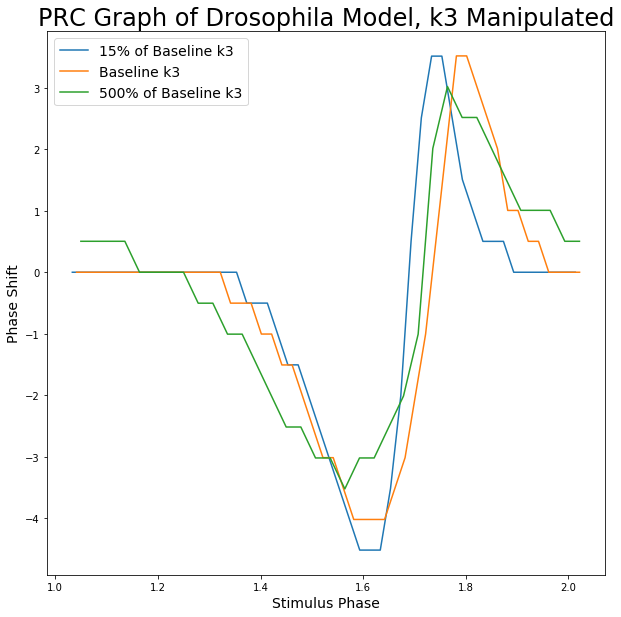

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal
#-------------------------------------------------------------------
# Function convert peak time into phase shift
#-------------------------------------------------------------------
def phase_shift(t_cont_peak, t_stiulated_peak):
    shift =  t_cont_peak - t_stiulated_peak    
    if abs(shift) > 0.5*period:        
        if shift < 0:
            shift = shift + period           
        else:
            shift = period - shift
    return shift
#-------------------------------------------------------------------
# Function takes vector x measured at times t and return peaks of variable x
#-------------------------------------------------------------------
def find_last_peak(x, t):
    # Find indices of last peaks
    peaks= signal.find_peaks_cwt(x, np.arange(5,15))
    last_peak_index =peaks[-2] 
    return [t[last_peak_index], x[last_peak_index]]
#-------------------------------------------------------------------
# Function to create a pulse
#-------------------------------------------------------------------
def pulse(t, t_start, stim_duration, intensity):
    step1 = intensity*(t > t_start)
    t_end = t_start + stim_duration
    step2 = intensity*(t > t_end  )
    return  (step1 - step2)
#-------------------------------------------------------------------
# Function whih calculates average period of a trace x taken at times t
# Only reliable if more than 3 peaks provided
#-------------------------------------------------------------------
def find_period(t, x):
    # Find indices for all peaks in the array x
    peaks= signal.find_peaks_cwt(x, np.arange(5,15))
    if len(peaks) <= 3:
        raise ValueError('Your trace have less than three peaks. Choose longer simulation time')
    # Remove first and last peak to avoid transients and incomplete peaks
    internal_peaks = peaks[1:-1]
    # Find periods as difference between times of consecutive peaks
    periods = np.diff(t[internal_peaks])
    # Calculate means of individual periods
    mean_period = np.mean(periods)
    return mean_period
#-------------------------------
# Plot control and stimulaed solution together with stimulus and last peaks
#-------------------------------
def make_plots():
    plt.plot(t,dT2_control, 'b')
    plt.plot(last_peak_control[0],last_peak_control[1], 'b*')
    plt.plot(t,dT2, 'r')
    plt.plot(last_peak[0],last_peak[1], 'r*')
    plt.plot(t,pulse(t, t_start, stim_duration, intensity), 'k')
    plt.xlabel('time')
    plt.ylabel('theta')
    #plt.ylim(-2,2)
    return()
#-------------------------------------------------------------------
# Model of harmonic pendulum. All values are n SI units
#-------------------------------------------------------------------
vsP=1.1
vmP=1.0
KmP=0.2
KIP=1.0
ksP=0.9
vdP=2.2
KdP=0.2
vsT=1.0
vmT=0.7
KmT=0.2
KIT=1.0
ksT=0.9
vdT=3.0
KdT=0.2
kdC=0.01
kdN=0.01
k1=0.8
k2=0.2
k3list=[0.18, 1.2, 6]
k4=0.6
kd=0.01
V1P=8.0
V1T=8.0
V2P=1.0
V2T=1.0
V3P=8.0
V3T=8.0
V4P=1.0
V4T=1.0
K1P=2.0
K1T=2.0
K2P=2.0
K2T=2.0
K3P=2.0
K3T=2.0
K4P=2.0
K4T=2.0
n=4.0

plt.figure(figsize=(10, 10))
def df_light(y, t):
    #assign input vector,y to variables of the model
        MP  = y[0]
        P0 = y[1]
        P1 = y[2]
        P2 = y[3]
        MT = y[4]
        T0 = y[5]
        T1 = y[6]
        T2 = y[7]
        C  = y[8]
        CN = y[9]
        #-----------------------------------------------
        # Fine right hand side of differential equations
        #-----------------------------------------------
        dMP = vsP*KIP**n/(KIP**n+CN**n) - (vmP*MP/(KmP+MP)+kd*MP)
        dP0 = ksP*MP + V2P*P1/(K2P+P1) -(V1P*P0/(K1P+P0)+kd*P0)
        dP1 = V1P*P0/(K1P+P0) + V4P*P2/(K4P+P2) - (V2P*P1/(K2P+P1)+V3P*P1/(K3P+P1)+kd*P1)
        dP2 = V3P*P1/(K3P+P1)+k4*C-(V4P*P2/(K4P+P2)+k3*P2*T2+vdP*P2/(KdP+P2)+kd*P2)
        dMT = vsT*KIT**n/(KIT**n+CN**n)-(vmT*MT/(KmT+MT)+kd*MT)
        dT0 = ksT*MT+V2T*T1/(K2T+T1)-(V1T*T0/(K1T+T0)+kd*T0)
        dT1 = V1T*T0/(K1T+T0)+V4T*T2/(K4T+T2)-(V2T*T1/(K2T+T1)+V3T*T1/(K3T+T1)+kd*T1)

        stimulus = pulse(t, t_start, stim_duration, intensity)

        dT2 = V3T*T1/(K3T+T1)+k4*C-(V4T*T2/(K4T+T2)+k3*P2*T2+(vdT+stimulus)*T2/(KdT+T2)+kd*T2)
        dC  = k3*P2*T2+k2*CN-(k4*C+k1*C+kdC*C)
        dCN = k1*C-(k2*CN+kdN*CN)

        return [dMP, dP0, dP1, dP2, dMT, dT0, dT1, dT2, dC, dCN]
labellist = ['15% of Baseline k3', 'Baseline k3', '500% of Baseline k3']
tlist = [110, 90, 70]
nphaseslist = [50, 50, 35]
period_list = [30, 24, 20]
for z in range (0,3) :
    k3 = k3list[z]
    label = labellist[z]
    #-------------------------------
    # Parameters for numerical simulation
    #-------------------------------
    y0= [0.0614368,0.0169928, 0.0141356, 0.0614368, 0.0860342, 0.0217261, 0.0213384, 0.0145428, 0.207614, 1.34728  ]
    #-------------------------------
    # Parameters for numerical simulation
    #-------------------------------
    T  = tlist[z]
    dt = 0.5
    stim_duration = 3
    intensity = 2
    nsteps = int(T/dt)
    t = np.linspace(0, T, nsteps)
    #-------------------------------
    # Solve equation for the pendulum in control(t_start=-10)
    #-------------------------------
    t_start = -10
    solution_control = odeint(df_light, y0, t)
    dT2_control = solution_control[:, 7]
    # Find last peak and calculate period of control solution
    last_peak_control = find_last_peak(dT2_control, t)
    period = find_period(t, dT2_control)
    #-------------------------------
    # Solve equation for the pendulum with stimulation applyed at t_start
    #-------------------------------

    # Chose number of points in PRC
    nphases = nphaseslist[z]
    # Calculate phase step
    period=period_list[z]
    phase_step = period/nphases
    # Prepare list to save phases and phase shifts
    phase_list = []
    phaselist = []
    phase_shift_list = []
    #-------------------------------------------------------------------
    #Apply pulse stimulus at each phase and calculatephase shift
    #-------------------------------------------------------------------

    for i in range(0, nphases):
        t_start = (i*phase_step)+(period+1)
        #Save current phase in a list
        phase_list.append(t_start)
        #Sovle ODE

        solution= odeint(df_light, y0, t)
        dT2 = solution[:, 7]
        #Find last peak and calculate phase shift
        last_peak = find_last_peak(dT2, t)
        shift = (phase_shift(last_peak_control[0], last_peak[0]))
        #Add current phase shift to a list
        phase_shift_list.append(shift)
        #Prepare subplot and plot current solution and stmulus
        #plt.subplot(nphases, 1, i+1)
        #make_plots()
        #Plot Phase responce curve
    for x in phase_list :
        z = x/period
        phaselist.append(z)
    #print(phaselist)
    plt.plot(phaselist, phase_shift_list, label = label)
plt.legend(loc =2, fontsize = 14)
plt.xlabel('Stimulus Phase' , fontsize=14)
plt.ylabel('Phase Shift' , fontsize=14)
plt.title('PRC Graph of Drosophila Model, k3 Manipulated', fontsize=24)
#plt.xlim(0,10)
plt.show() 


# 2. Figure 4:

## 2.a. Unentrained k3

The following code produces a figure that is not used in this poster. This code produces unentrained data with a manipulated k3 value (see the k3 list--longest, control, shortest). We need the following code so that we know the range of FRP values that this variable is capable of producing. We will then take the periods printed as our FRP values produced here and use them to label our graphs (see legend of graphs in Figure 4) so that the viewer can see the range of FRPs and how they entrain. 

k3 =  6  period =  17.0407664594
k3 =  1.2  period =  23.4560570071
k3 =  0.18  period =  30.0204192191


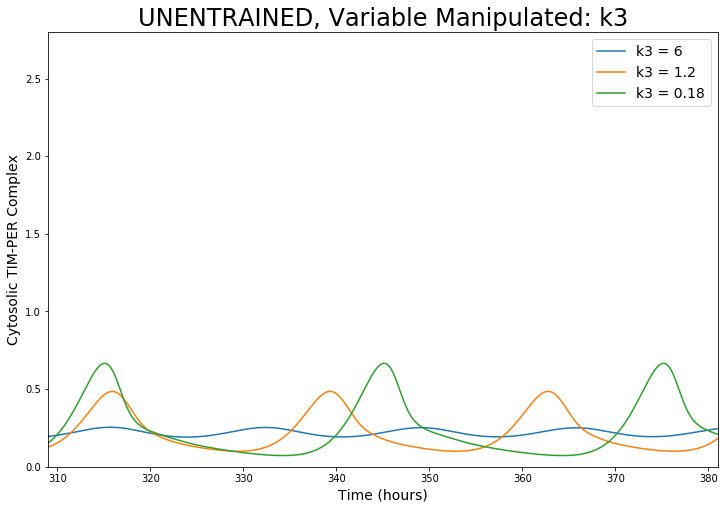

In [47]:
"""
Model of circadian rythm in drosophila
Limit cycle models for circadian rhythms based on transcriptional regulation in Drosophila and Neurospora.
Leloup JC, Gonze D, Goldbeter A. J Biol Rhythms.1999 Dec;14(6):433-48. 10643740, 
"""

from scipy import signal
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
%matplotlib inline

#-----------------------------------------------
# Model parameters
#-----------------------------------------------
vsP=1.1
vmP=1.0
KmP=0.2
KIP=1.0
ksP=0.9
vdP=2.2
KdP=0.2
vsT=1.0
vmT=0.7
KmT=0.2
KIT=1.0
ksT=0.9 
vdT = 3.0
KdT=0.2
kdC=0.01
kdN=0.01
k1=0.8
k2=0.2
#=============================================================
#Manipulate chosen variable
#=============================================================
k3_list=[6,1.2,0.18]
k4=0.6
kd=0.01
V1P=8.0
V1T=8.0
V2P=1.0
V2T=1.0
V3P=8.0
V3T=8.0
V4P=1.0
V4T=1.0
K1P=2.0
K1T=2.0
K2P=2.0
K2T=2.0
K3P=2.0
K3T=2.0
K4P=2.0
K4T=2.0
n=4.0

def phase_shift(t_cont_peak, t_stimulated_peak):
    shift =  t_cont_peak - t_stiulated_peak    
    if abs(shift) > 0.5*period:        
        if shift < 0:
            shift = shift + period           
        else:
            shift = period - shift
    return shift
#-------------------------------------------------------------------
# Function whih calculates average period of a trace x taken at times t
# Only reliable if more than 3 peaks provided
#-------------------------------------------------------------------
def find_period(t, x):
    # Find indices for all peaks in the array x
    peaks= signal.find_peaks_cwt(x, np.arange(5,15))
    if len(peaks) <= 3:
        raise ValueError('Your trace have less than three peaks. Choose longer simulation time')
    # Remove first and last peak to avoid transients and incomplete peaks
    internal_peaks = peaks[1:-1]
    # Find periods as difference between times of consecutive peaks
    periods = np.diff(t[internal_peaks])
    # Calculate means of individual periods
    mean_period = np.mean(periods)
    return mean_period

#-----------------------------------------------
# solve the system dy/dt = f(y, t)
#-----------------------------------------------
def df_light(y, t):
    #assign input vector,y to variables of the model
    MP  = y[0]
    P0 = y[1]
    P1 = y[2]
    P2 = y[3]
    MT = y[4]
    T0 = y[5]
    T1 = y[6]
    T2 = y[7]
    C  = y[8]
    CN = y[9]
    #-----------------------------------------------
    # Fine right hand side of differential equations
    #-----------------------------------------------
    dMP = vsP*KIP**n/(KIP**n+CN**n) - (vmP*MP/(KmP+MP)+kd*MP)
    dP0 = ksP*MP + V2P*P1/(K2P+P1) -(V1P*P0/(K1P+P0)+kd*P0)
    dP1 = V1P*P0/(K1P+P0) + V4P*P2/(K4P+P2) - (V2P*P1/(K2P+P1)+V3P*P1/(K3P+P1)+kd*P1)
    dP2 = V3P*P1/(K3P+P1)+k4*C-(V4P*P2/(K4P+P2)+k3*P2*T2+vdP*P2/(KdP+P2)+kd*P2)
    dMT = vsT*KIT**n/(KIT**n+CN**n)-(vmT*MT/(KmT+MT)+kd*MT)
    dT0 = ksT*MT+V2T*T1/(K2T+T1)-(V1T*T0/(K1T+T0)+kd*T0)
    dT1 = V1T*T0/(K1T+T0)+V4T*T2/(K4T+T2)-(V2T*T1/(K2T+T1)+V3T*T1/(K3T+T1)+kd*T1)
    dT2 = V3T*T1/(K3T+T1)+k4*C-(V4T*T2/(K4T+T2)+k3*P2*T2+vdT*T2/(KdT+T2)+kd*T2)
    dC  = k3*P2*T2+k2*CN-(k4*C+k1*C+kdC*C)
    dCN = k1*C-(k2*CN+kdN*CN)
   
    return [dMP, dP0, dP1, dP2, dMT, dT0, dT1, dT2, dC, dCN]

#-----------------------------------------------
# Choose numerical parameters
#-----------------------------------------------
T = 400.
dt=0.05
nsteps=int(T/dt)
t  = np.linspace(0, T, nsteps) 
#-----------------------------------------------
# Choose initial conditions
#-----------------------------------------------
y0 = [0.84408477,  0.22203301,  0.1949542,   0.09203391,  1.57808146,  0.45719566,0.38128203,  0.05499587,  0.09424295,  0.60205721]     
#-----------------------------------------------
# solve system of differential equations
#-----------------------------------------------


#=============================================================
#Make list of periods per these variable values
#=============================================================
k3_period_list = []

plt.figure(figsize=(12,8))
for x in range(0,3) :
    k3 = k3_list[x]
    soln = odeint(df_light, y0, t)
    MP = soln[:,0]
    P0 = soln[:,1]
    P1 = soln[:,2]
    P2 = soln[:,3]
    MT = soln[:,4]
    T0 = soln[:,5]
    T1 = soln[:,6]
    T2 = soln[:,7]
    C  = soln[:,8]
    CN = soln[:,9]

    PT = P0+P1+P2+C+CN

    #=============================================================#
    #Add the FRPs to the period list and print the list
    #=============================================================#
    period = find_period(t, C)
    k3_period_list.append(period)  
    print('k3 = ',k3,' period = ', period)
    #**************************Smallest and Largest values printed used to make graph 5*********


    
    #-----------------------------------------------
    # plot results
    #-----------------------------------------------    
    plt. plot(t, C, label = "k3 = " +str(k3_list[x]))
    plt.xlabel('Time (hours)', fontsize = 14)
    plt.ylabel('Cytosolic TIM-PER Complex', fontsize = 14)
    plt.legend(loc=1, fontsize=14)
    plt.xlim(309,381)
    plt.ylim(0,2.8)
    plt.title("UNENTRAINED, Variable Manipulated: k3", fontsize = 24)    
plt.show()


## 2.b. Entrained k3

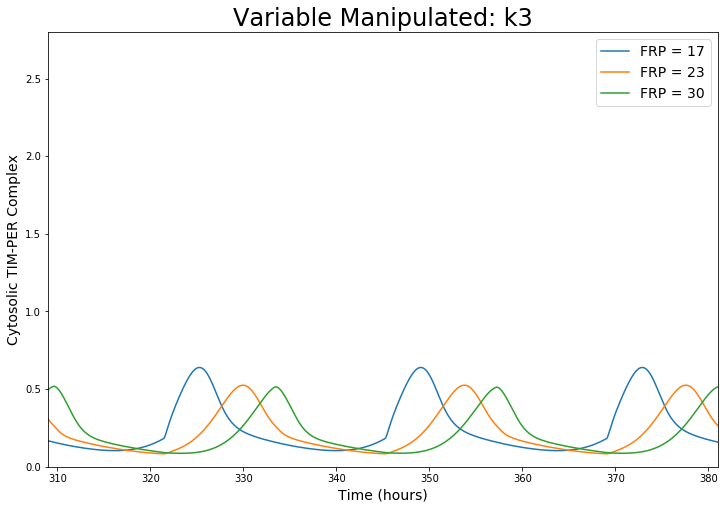

In [46]:
"""
Model of circadian rythm in drosophila
Limit cycle models for circadian rhythms based on transcriptional regulation in Drosophila and Neurospora.
Leloup JC, Gonze D, Goldbeter A. J Biol Rhythms.1999 Dec;14(6):433-48. 10643740, 
"""

from scipy import signal
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
%matplotlib inline

#-----------------------------------------------
# Model parameters
#-----------------------------------------------
vsP=1.1
vmP=1.0
KmP=0.2
KIP=1.0
ksP=0.9
vdP=2.2
KdP=0.2
vsT=1.0
vmT=0.7
KmT=0.2
KIT=1.0
ksT=0.9 
#=============================================================
#Take out original vdT value (to replace with square wave in equations)
#=============================================================
#vdT = 3.0
KdT=0.2
kdC=0.01
kdN=0.01
k1=0.8
k2=0.2
#=============================================================
#Manipulate chosen variable
#=============================================================
k3_list=[6,1.2,0.18]
k4=0.6
kd=0.01
V1P=8.0
V1T=8.0
V2P=1.0
V2T=1.0
V3P=8.0
V3T=8.0
V4P=1.0
V4T=1.0
K1P=2.0
K1T=2.0
K2P=2.0
K2T=2.0
K3P=2.0
K3T=2.0
K4P=2.0
K4T=2.0
n=4.0

def phase_shift(t_cont_peak, t_stimulated_peak):
    shift =  t_cont_peak - t_stiulated_peak    
    if abs(shift) > 0.5*period:        
        if shift < 0:
            shift = shift + period           
        else:
            shift = period - shift
    return shift

#-----------------------------------------------
# solve the system dy/dt = f(y, t)
#-----------------------------------------------
def df_light(y, t):
    #assign input vector,y to variables of the model
    MP  = y[0]
    P0 = y[1]
    P1 = y[2]
    P2 = y[3]
    MT = y[4]
    T0 = y[5]
    T1 = y[6]
    T2 = y[7]
    C  = y[8]
    CN = y[9]
    #-----------------------------------------------
    # Fine right hand side of differential equations
    #-----------------------------------------------
    dMP = vsP*KIP**n/(KIP**n+CN**n) - (vmP*MP/(KmP+MP)+kd*MP)
    dP0 = ksP*MP + V2P*P1/(K2P+P1) -(V1P*P0/(K1P+P0)+kd*P0)
    dP1 = V1P*P0/(K1P+P0) + V4P*P2/(K4P+P2) - (V2P*P1/(K2P+P1)+V3P*P1/(K3P+P1)+kd*P1)
    dP2 = V3P*P1/(K3P+P1)+k4*C-(V4P*P2/(K4P+P2)+k3*P2*T2+vdP*P2/(KdP+P2)+kd*P2)
    dMT = vsT*KIT**n/(KIT**n+CN**n)-(vmT*MT/(KmT+MT)+kd*MT)
    dT0 = ksT*MT+V2T*T1/(K2T+T1)-(V1T*T0/(K1T+T0)+kd*T0)
    dT1 = V1T*T0/(K1T+T0)+V4T*T2/(K4T+T2)-(V2T*T1/(K2T+T1)+V3T*T1/(K3T+T1)+kd*T1)
    #=============================================================#
    #Implement the entrainment square wave below
    #=============================================================#
    dT2 = V3T*T1/(K3T+T1)+k4*C-(V4T*T2/(K4T+T2)+k3*P2*T2+(1.5*signal.square((2 * np.pi * 0.042 * t))+4.5)*T2/(KdT+T2)+kd*T2)
    dC  = k3*P2*T2+k2*CN-(k4*C+k1*C+kdC*C)
    dCN = k1*C-(k2*CN+kdN*CN)
   
    return [dMP, dP0, dP1, dP2, dMT, dT0, dT1, dT2, dC, dCN]

#-----------------------------------------------
# Choose numerical parameters
#-----------------------------------------------
T = 400.
dt=0.05
nsteps=int(T/dt)
t  = np.linspace(0, T, nsteps) 
#-----------------------------------------------
# Choose initial conditions
#-----------------------------------------------
y0 = [0.84408477,  0.22203301,  0.1949542,   0.09203391,  1.57808146,  0.45719566,0.38128203,  0.05499587,  0.09424295,  0.60205721]     

#=============================================================#
#the following list is derived from the print out FRPs from the previous code (1.a.) above
#=============================================================#
FRP_list=[17,23,30]
#**************************Smallest and Largest values above used to make graph 5*********


plt.figure(figsize=(12,8))

#-----------------------------------------------
# solve system of differential equations
#-----------------------------------------------
for x in range(0,3) :
    k3 = k3_list[x]
    #=============================================================
    #Label curves with FRP values 
    #=============================================================
    label = FRP_list[x]
    soln = odeint(df_light, y0, t)
    MP = soln[:,0]
    P0 = soln[:,1]
    P1 = soln[:,2]
    P2 = soln[:,3]
    MT = soln[:,4]
    T0 = soln[:,5]
    T1 = soln[:,6]
    T2 = soln[:,7]
    C  = soln[:,8]
    CN = soln[:,9]

    PT = P0+P1+P2+C+CN

    #-----------------------------------------------
    # plot results
    #-----------------------------------------------
    
    #=============================================================
    #Label the traces with their FRP value
    #=============================================================
    plt. plot(t, C, label = "FRP = "+str(label))
    plt.xlabel('Time (hours)', fontsize = 14)
    plt.ylabel('Cytosolic TIM-PER Complex', fontsize = 14)
    plt.legend(loc=1, fontsize=14)
    plt.xlim(309,381)
    plt.ylim(0,2.8)
    plt.title("Variable Manipulated: k3", fontsize = 24)
plt.show()


## 2.c. Unentrained k1

The following code produces a figure that is not used in this poster. This code produces unentrained data with a manipulated k1 value (see the k1 list--longest, control, shortest). We need the following code so that we know the range of FRP values that this variable is capable of producing. We will then take the periods printed as our FRP values produced here and use them to label our graphs (see legend of graphs in Figure 4) so that the viewer can see the range of FRPs and how they entrain. 

k1 =  1.7  period =  21.1997087871
k1 =  0.8  period =  23.4685585698
k1 =  0.2  period =  27.7226961062


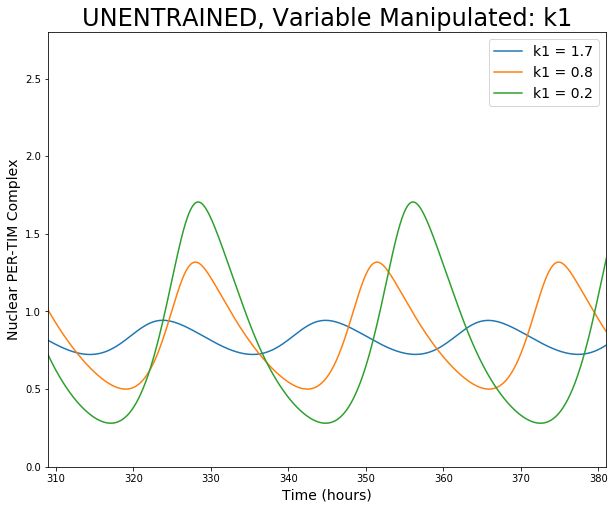

In [45]:
"""
Model of circadian rythm in drosophila
Limit cycle models for circadian rhythms based on transcriptional regulation in Drosophila and Neurospora.
Leloup JC, Gonze D, Goldbeter A. J Biol Rhythms.1999 Dec;14(6):433-48. 10643740, 
"""

from scipy import signal
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
%matplotlib inline

def find_period(t, x):
    # Find indices for all peaks in the array x
    peaks= signal.find_peaks_cwt(x, np.arange(5,15))
    if len(peaks) <= 3:
        raise ValueError('Your trace have less than three peaks. Choose longer simulation time')
    # Remove first and last peak to avoid transients and incomplete peaks
    internal_peaks = peaks[1:-1]
    # Find periods as difference between times of consecutive peaks
    periods = np.diff(t[internal_peaks])
    # Calculate means of individual periods
    mean_period = np.mean(periods)
    return mean_period

#-----------------------------------------------
# Model parameters
#-----------------------------------------------
vsP=1.1
vmP=1.0
KmP=0.2
KIP=1.0
ksP=0.9
vdP=2.2
KdP=0.2
vsT=1.0
vmT=0.7
KmT=0.2
KIT=1.0
ksT=0.9
VdT = 3.
KdT=0.2
kdC=0.01
kdN=0.01
#=============================================================
#Comment original value of manipulated variable
#=============================================================
#k1=0.8
k2=0.2
k3=1.2
k4=0.6
kd=0.01
V1P=8.0
V1T=8.0
V2P=1.0
V2T=1.0
V3P=8.0
V3T=8.0
V4P=1.0
V4T=1.0
K1P=2.0
K1T=2.0
K2P=2.0
K2T=2.0
K3P=2.0
K3T=2.0
K4P=2.0
K4T=2.0
n=4.0

#-----------------------------------------------
# solve the system dy/dt = f(y, t)
#-----------------------------------------------
def df_light(y, t):
    #assign input vector,y to variables of the model
    MP  = y[0]
    P0 = y[1]
    P1 = y[2]
    P2 = y[3]
    MT = y[4]
    T0 = y[5]
    T1 = y[6]
    T2 = y[7]
    C  = y[8]
    CN = y[9]
    #-----------------------------------------------
    # Fine right hand side of differential equations
    #-----------------------------------------------
    dMP = vsP*KIP**n/(KIP**n+CN**n) - (vmP*MP/(KmP+MP)+kd*MP)
    dP0 = ksP*MP + V2P*P1/(K2P+P1) -(V1P*P0/(K1P+P0)+kd*P0)
    dP1 = V1P*P0/(K1P+P0) + V4P*P2/(K4P+P2) - (V2P*P1/(K2P+P1)+V3P*P1/(K3P+P1)+kd*P1)
    dP2 = V3P*P1/(K3P+P1)+k4*C-(V4P*P2/(K4P+P2)+k3*P2*T2+vdP*P2/(KdP+P2)+kd*P2)
    dMT = vsT*KIT**n/(KIT**n+CN**n)-(vmT*MT/(KmT+MT)+kd*MT)
    dT0 = ksT*MT+V2T*T1/(K2T+T1)-(V1T*T0/(K1T+T0)+kd*T0)
    dT1 = V1T*T0/(K1T+T0)+V4T*T2/(K4T+T2)-(V2T*T1/(K2T+T1)+V3T*T1/(K3T+T1)+kd*T1)
    dT2 = V3T*T1/(K3T+T1)+k4*C-(V4T*T2/(K4T+T2)+k3*P2*T2+VdT*T2/(KdT+T2)+kd*T2)
    dC  = k3*P2*T2+k2*CN-(k4*C+k1*C+kdC*C)
    dCN = k1*C-(k2*CN+kdN*CN)
   
    return [dMP, dP0, dP1, dP2, dMT, dT0, dT1, dT2, dC, dCN]

plt.figure(figsize=(10,8))

#-----------------------------------------------
# Choose numerical parameters
#-----------------------------------------------

paramlist = [1.7,0.8,0.2]

#=============================================================
#Make list of periods per these variable values
#=============================================================
periodlist = []

for x in range(0,3):
    k1 = paramlist[x]
    T = 400.
    dt=0.05
    nsteps=int(T/dt)
    t  = np.linspace(0, T, nsteps) 
    #-----------------------------------------------
    # Choose initial conditions
    #-----------------------------------------------
    y0= [0.0614368,0.0169928, 0.0141356, 0.0614368, 0.0860342, 0.0217261, 0.0213384, 0.0145428, 0.207614, 1.34728  ]       
    #-----------------------------------------------
    # solve system of differential equations
    #-----------------------------------------------
    soln = odeint(df_light, y0, t)
    MP = soln[:,0]
    P0 = soln[:,1]
    P1 = soln[:,2]
    P2 = soln[:,3]
    MT = soln[:,4]
    T0 = soln[:,5]
    T1 = soln[:,6]
    T2 = soln[:,7]
    C  = soln[:,8]
    CN = soln[:,9]

    PT = P0+P1+P2+C+CN
    #=============================================================
    #Find FRPs, add them to the list of periods, and print this list per k1 value
    #=============================================================
    period = find_period(t,CN)
    periodlist.append(period)
    print('k1 = ',k1,' period = ', period)
    #**************************Smallest and Largest values printed used to make graph 5*********



    #-----------------------------------------------
    # plot results
    #-----------------------------------------------
    plt. plot(t, CN, label = "k1 = " + str(paramlist[x]))
    plt.title('Entrainment Under Manipulation of K1' )
plt.xlabel('Time (hours)', fontsize = 14)
plt.ylabel('Nuclear PER-TIM Complex', fontsize = 14)
plt.title("UNENTRAINED, Variable Manipulated: k1", fontsize = 24)
plt.legend(loc=1, fontsize = 14)
plt.xlim(309,381)
plt.ylim(0,2.8)
plt.show()



## 2.d. Entrained k1

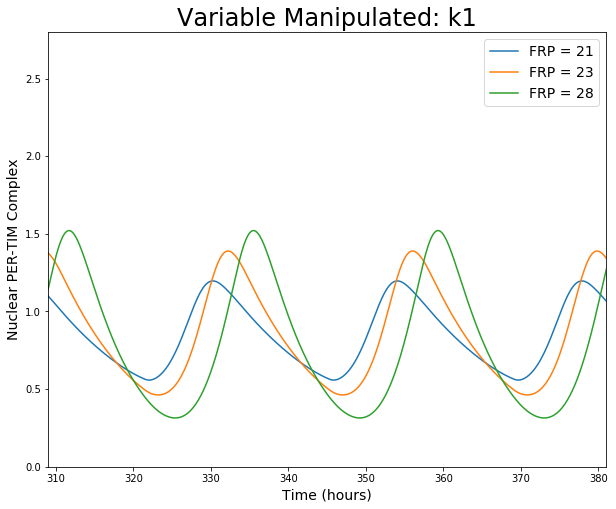

In [44]:
"""
Model of circadian rythm in drosophila
Limit cycle models for circadian rhythms based on transcriptional regulation in Drosophila and Neurospora.
Leloup JC, Gonze D, Goldbeter A. J Biol Rhythms.1999 Dec;14(6):433-48. 10643740, 
"""

from scipy import signal
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
%matplotlib inline

#-----------------------------------------------
# Model parameters
#-----------------------------------------------
vsP=1.1
vmP=1.0
KmP=0.2
KIP=1.0
ksP=0.9
vdP=2.2
KdP=0.2
vsT=1.0
vmT=0.7
KmT=0.2
KIT=1.0
ksT=0.9
#=============================================================#
#Comment original VdT value 
#=============================================================#
#VdT = 3.
KdT=0.2
kdC=0.01
kdN=0.01
#=============================================================#
#Comment original manipulated variable value
#=============================================================#
#k1=0.8
k2=0.2
k3=1.2
k4=0.6
kd=0.01
V1P=8.0
V1T=8.0
V2P=1.0
V2T=1.0
V3P=8.0
V3T=8.0
V4P=1.0
V4T=1.0
K1P=2.0
K1T=2.0
K2P=2.0
K2T=2.0
K3P=2.0
K3T=2.0
K4P=2.0
K4T=2.0
n=4.0

#-----------------------------------------------
# solve the system dy/dt = f(y, t)
#-----------------------------------------------
def df_light(y, t):
    #assign input vector,y to variables of the model
    MP  = y[0]
    P0 = y[1]
    P1 = y[2]
    P2 = y[3]
    MT = y[4]
    T0 = y[5]
    T1 = y[6]
    T2 = y[7]
    C  = y[8]
    CN = y[9]
    #-----------------------------------------------
    # Fine right hand side of differential equations
    #-----------------------------------------------
    dMP = vsP*KIP**n/(KIP**n+CN**n) - (vmP*MP/(KmP+MP)+kd*MP)
    dP0 = ksP*MP + V2P*P1/(K2P+P1) -(V1P*P0/(K1P+P0)+kd*P0)
    dP1 = V1P*P0/(K1P+P0) + V4P*P2/(K4P+P2) - (V2P*P1/(K2P+P1)+V3P*P1/(K3P+P1)+kd*P1)
    dP2 = V3P*P1/(K3P+P1)+k4*C-(V4P*P2/(K4P+P2)+k3*P2*T2+vdP*P2/(KdP+P2)+kd*P2)
    dMT = vsT*KIT**n/(KIT**n+CN**n)-(vmT*MT/(KmT+MT)+kd*MT)
    dT0 = ksT*MT+V2T*T1/(K2T+T1)-(V1T*T0/(K1T+T0)+kd*T0)
    dT1 = V1T*T0/(K1T+T0)+V4T*T2/(K4T+T2)-(V2T*T1/(K2T+T1)+V3T*T1/(K3T+T1)+kd*T1)
    #=============================================================#
    #Implement the square wave to entrain
    #=============================================================#
    dT2 = V3T*T1/(K3T+T1)+k4*C-(V4T*T2/(K4T+T2)+k3*P2*T2+(1.5*signal.square((2 * np.pi * 0.042 * t))+4.5)*T2/(KdT+T2)+kd*T2)
    dC  = k3*P2*T2+k2*CN-(k4*C+k1*C+kdC*C)
    dCN = k1*C-(k2*CN+kdN*CN)
   
    return [dMP, dP0, dP1, dP2, dMT, dT0, dT1, dT2, dC, dCN]

plt.figure(figsize=(10,8))

#-----------------------------------------------
# Choose numerical parameters
#-----------------------------------------------
#=============================================================#
#Take FRP values from code above (2.c.) to use as legend 
#=============================================================#
mylegend = ['FRP = 21',  'FRP = 23', 'FRP = 28']
#**************************Smallest and Largest values above used to make graph 5*********

paramlist = [1.7,0.8,0.2]
for x in range(0,3):
    k1 = paramlist[x]
    T = 400.
    dt=0.05
    nsteps=int(T/dt)
    t  = np.linspace(0, T, nsteps) 
    #-----------------------------------------------
    # Choose initial conditions
    #-----------------------------------------------
    y0= [0.0614368,0.0169928, 0.0141356, 0.0614368, 0.0860342, 0.0217261, 0.0213384, 0.0145428, 0.207614, 1.34728  ]       
    #-----------------------------------------------
    # solve system of differential equations
    #-----------------------------------------------
    soln = odeint(df_light, y0, t)
    MP = soln[:,0]
    P0 = soln[:,1]
    P1 = soln[:,2]
    P2 = soln[:,3]
    MT = soln[:,4]
    T0 = soln[:,5]
    T1 = soln[:,6]
    T2 = soln[:,7]
    C  = soln[:,8]
    CN = soln[:,9]

    PT = P0+P1+P2+C+CN

    #-----------------------------------------------
    # plot results
    #-----------------------------------------------

    #=============================================================#
    #Label the curves with the original FRPs per the k1 value (from 2.c.)
    #=============================================================#
    plt. plot(t, CN, label = mylegend[x])
    plt.title('Entrainment Under Manipulation of K1' )
plt.xlabel('Time (hours)', fontsize = 14)
plt.ylabel('Nuclear PER-TIM Complex', fontsize = 14)
plt.title("Variable Manipulated: k1", fontsize = 24)
plt.legend(loc=1, fontsize = 14)
plt.xlim(309,381)
plt.ylim(0,2.8)
plt.show()


## 2.e. Unentrained k2

The following code produces a figure that is not used in this poster. This code produces unentrained data with a manipulated k2 value (see the k2 list--longest, control, shortest). We need the following code so that we know the range of FRP values that this variable is capable of producing. We will then take the periods printed as our FRP values produced here and use them to label our graphs (see legend of graphs in Figure 4) so that the viewer can see the range of FRPs and how they entrain. 

k2 =  0.1  period =  24.5397341334
k2 =  0.2  period =  23.4685585698
k2 =  0.6  period =  20.5081190704


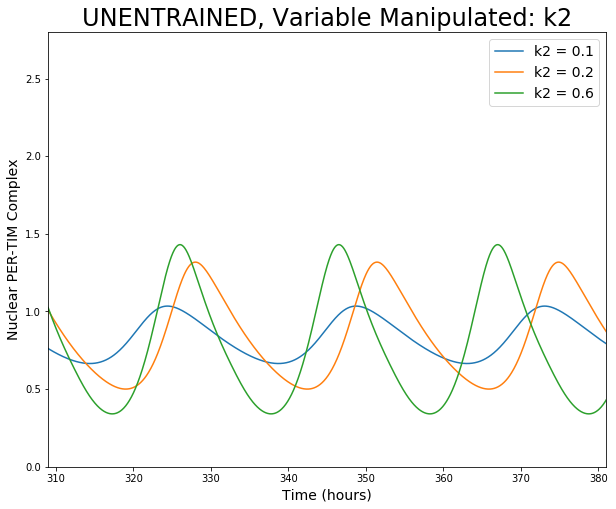

In [43]:
"""
Model of circadian rythm in drosophila
Limit cycle models for circadian rhythms based on transcriptional regulation in Drosophila and Neurospora.
Leloup JC, Gonze D, Goldbeter A. J Biol Rhythms.1999 Dec;14(6):433-48. 10643740, 
"""

from scipy import signal
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
%matplotlib inline

def find_period(t, x):
    # Find indices for all peaks in the array x
    peaks= signal.find_peaks_cwt(x, np.arange(5,15))
    if len(peaks) <= 3:
        raise ValueError('Your trace have less than three peaks. Choose longer simulation time')
    # Remove first and last peak to avoid transients and incomplete peaks
    internal_peaks = peaks[1:-1]
    # Find periods as difference between times of consecutive peaks
    periods = np.diff(t[internal_peaks])
    # Calculate means of individual periods
    mean_period = np.mean(periods)
    return mean_period

#-----------------------------------------------
# Model parameters
#-----------------------------------------------
vsP=1.1
vmP=1.0
KmP=0.2
KIP=1.0
ksP=0.9
vdP=2.2
KdP=0.2
vsT=1.0
vmT=0.7
KmT=0.2
KIT=1.0
ksT=0.9
VdT = 3.
KdT=0.2
kdC=0.01
kdN=0.01
k1=0.8
#=============================================================#
#Comment original k2 value
#=============================================================#
#k2=0.2
k3=1.2
k4=0.6
kd=0.01
V1P=8.0
V1T=8.0
V2P=1.0
V2T=1.0
V3P=8.0
V3T=8.0
V4P=1.0
V4T=1.0
K1P=2.0
K1T=2.0
K2P=2.0
K2T=2.0
K3P=2.0
K3T=2.0
K4P=2.0
K4T=2.0
n=4.0

#-----------------------------------------------
# solve the system dy/dt = f(y, t)
#-----------------------------------------------
def df_light(y, t):
    #assign input vector,y to variables of the model
    MP  = y[0]
    P0 = y[1]
    P1 = y[2]
    P2 = y[3]
    MT = y[4]
    T0 = y[5]
    T1 = y[6]
    T2 = y[7]
    C  = y[8]
    CN = y[9]
    #-----------------------------------------------
    # Fine right hand side of differential equations
    #-----------------------------------------------
    dMP = vsP*KIP**n/(KIP**n+CN**n) - (vmP*MP/(KmP+MP)+kd*MP)
    dP0 = ksP*MP + V2P*P1/(K2P+P1) -(V1P*P0/(K1P+P0)+kd*P0)
    dP1 = V1P*P0/(K1P+P0) + V4P*P2/(K4P+P2) - (V2P*P1/(K2P+P1)+V3P*P1/(K3P+P1)+kd*P1)
    dP2 = V3P*P1/(K3P+P1)+k4*C-(V4P*P2/(K4P+P2)+k3*P2*T2+vdP*P2/(KdP+P2)+kd*P2)
    dMT = vsT*KIT**n/(KIT**n+CN**n)-(vmT*MT/(KmT+MT)+kd*MT)
    dT0 = ksT*MT+V2T*T1/(K2T+T1)-(V1T*T0/(K1T+T0)+kd*T0)
    dT1 = V1T*T0/(K1T+T0)+V4T*T2/(K4T+T2)-(V2T*T1/(K2T+T1)+V3T*T1/(K3T+T1)+kd*T1)
    dT2 = V3T*T1/(K3T+T1)+k4*C-(V4T*T2/(K4T+T2)+k3*P2*T2+VdT*T2/(KdT+T2)+kd*T2)
    dC  = k3*P2*T2+k2*CN-(k4*C+k1*C+kdC*C)
    dCN = k1*C-(k2*CN+kdN*CN)
   
    return [dMP, dP0, dP1, dP2, dMT, dT0, dT1, dT2, dC, dCN]

plt.figure(figsize=(10,8))

#-----------------------------------------------
# Choose numerical parameters
#-----------------------------------------------

#=============================================================#
#Make a list of periods per the k2 values
#=============================================================#
periodlist = []
paramlist = [.1,0.2,0.6]
for x in range(0,3):
    k2 = paramlist[x]
    T = 400.
    dt=0.05
    nsteps=int(T/dt)
    t  = np.linspace(0, T, nsteps) 
    #-----------------------------------------------
    # Choose initial conditions
    #-----------------------------------------------
    y0= [0.0614368,0.0169928, 0.0141356, 0.0614368, 0.0860342, 0.0217261, 0.0213384, 0.0145428, 0.207614, 1.34728  ]       
    #-----------------------------------------------
    # solve system of differential equations
    #-----------------------------------------------
    soln = odeint(df_light, y0, t)
    MP = soln[:,0]
    P0 = soln[:,1]
    P1 = soln[:,2]
    P2 = soln[:,3]
    MT = soln[:,4]
    T0 = soln[:,5]
    T1 = soln[:,6]
    T2 = soln[:,7]
    C  = soln[:,8]
    CN = soln[:,9]

    PT = P0+P1+P2+C+CN
    
    #=============================================================
    #Find FRPs, add them to the period list, then print this list per k2 value
    #=============================================================
    period = find_period(t,CN)
    periodlist.append(period)
    print('k2 = ',paramlist[x],' period = ', period)
    #**************************Smallest and Largest values printed used to make graph 5*********



    #-----------------------------------------------
    # plot results
    #-----------------------------------------------
    
    plt. plot(t, CN, label = "k2 = " +str(paramlist[x]))
    plt.title('UNENTRAINED, Manipulation of K2' )
plt.xlabel('Time (hours)', fontsize = 14)
plt.ylabel('Nuclear PER-TIM Complex', fontsize = 14)
plt.title("UNENTRAINED, Variable Manipulated: k2", fontsize = 24)
plt.legend(loc=1, fontsize = 14)
plt.xlim(309,381)
plt.ylim(0,2.8)
plt.show()


## 2.f. Entrained k2

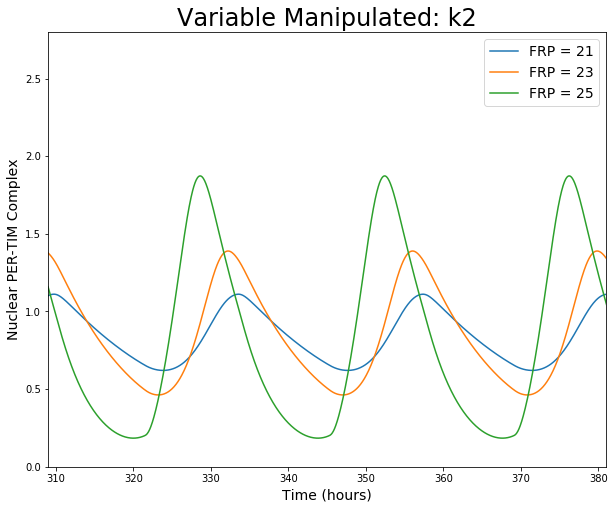

In [42]:
"""
Model of circadian rythm in drosophila
Limit cycle models for circadian rhythms based on transcriptional regulation in Drosophila and Neurospora.
Leloup JC, Gonze D, Goldbeter A. J Biol Rhythms.1999 Dec;14(6):433-48. 10643740, 
"""

from scipy import signal
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
%matplotlib inline

#-----------------------------------------------
# Model parameters
#-----------------------------------------------
vsP=1.1
vmP=1.0
KmP=0.2
KIP=1.0
ksP=0.9
vdP=2.2
KdP=0.2
vsT=1.0
vmT=0.7
KmT=0.2
KIT=1.0
ksT=0.9
#=============================================================#
#Comment original VdT value
#=============================================================#
#VdT = 3.
KdT=0.2
kdC=0.01
kdN=0.01
k1=0.8
#=============================================================#
#Comment original k2 value
#=============================================================#
#k2=0.2
k3=1.2
k4=0.6
kd=0.01
V1P=8.0
V1T=8.0
V2P=1.0
V2T=1.0
V3P=8.0
V3T=8.0
V4P=1.0
V4T=1.0
K1P=2.0
K1T=2.0
K2P=2.0
K2T=2.0
K3P=2.0
K3T=2.0
K4P=2.0
K4T=2.0
n=4.0

#-----------------------------------------------
# solve the system dy/dt = f(y, t)
#-----------------------------------------------
def df_light(y, t):
    #assign input vector,y to variables of the model
    MP  = y[0]
    P0 = y[1]
    P1 = y[2]
    P2 = y[3]
    MT = y[4]
    T0 = y[5]
    T1 = y[6]
    T2 = y[7]
    C  = y[8]
    CN = y[9]
    #-----------------------------------------------
    # Fine right hand side of differential equations
    #-----------------------------------------------
    dMP = vsP*KIP**n/(KIP**n+CN**n) - (vmP*MP/(KmP+MP)+kd*MP)
    dP0 = ksP*MP + V2P*P1/(K2P+P1) -(V1P*P0/(K1P+P0)+kd*P0)
    dP1 = V1P*P0/(K1P+P0) + V4P*P2/(K4P+P2) - (V2P*P1/(K2P+P1)+V3P*P1/(K3P+P1)+kd*P1)
    dP2 = V3P*P1/(K3P+P1)+k4*C-(V4P*P2/(K4P+P2)+k3*P2*T2+vdP*P2/(KdP+P2)+kd*P2)
    dMT = vsT*KIT**n/(KIT**n+CN**n)-(vmT*MT/(KmT+MT)+kd*MT)
    dT0 = ksT*MT+V2T*T1/(K2T+T1)-(V1T*T0/(K1T+T0)+kd*T0)
    dT1 = V1T*T0/(K1T+T0)+V4T*T2/(K4T+T2)-(V2T*T1/(K2T+T1)+V3T*T1/(K3T+T1)+kd*T1)
    #=============================================================#
    #Implement the entrainment square wave
    #=============================================================#
    dT2 = V3T*T1/(K3T+T1)+k4*C-(V4T*T2/(K4T+T2)+k3*P2*T2+(1.5*signal.square((2 * np.pi * 0.042 * t))+4.5)*T2/(KdT+T2)+kd*T2)
    dC  = k3*P2*T2+k2*CN-(k4*C+k1*C+kdC*C)
    dCN = k1*C-(k2*CN+kdN*CN)
   
    return [dMP, dP0, dP1, dP2, dMT, dT0, dT1, dT2, dC, dCN]

plt.figure(figsize=(10,8))

#-----------------------------------------------
# Choose numerical parameters
#-----------------------------------------------

#=============================================================#
#Make a legend per the FRP values from the last experiment (2.e)
#=============================================================#
mylegend = ['FRP = 21', 'FRP = 23', 'FRP = 25']
#**************************Smallest and Largest values above used to make graph 5*********

paramlist = [.1,0.2,0.6]
for x in range(0,3):
    k2 = paramlist[x]
    T = 400.
    dt=0.05
    nsteps=int(T/dt)
    t  = np.linspace(0, T, nsteps) 
    #-----------------------------------------------
    # Choose initial conditions
    #-----------------------------------------------
    y0= [0.0614368,0.0169928, 0.0141356, 0.0614368, 0.0860342, 0.0217261, 0.0213384, 0.0145428, 0.207614, 1.34728  ]       
    #-----------------------------------------------
    # solve system of differential equations
    #-----------------------------------------------
    soln = odeint(df_light, y0, t)
    MP = soln[:,0]
    P0 = soln[:,1]
    P1 = soln[:,2]
    P2 = soln[:,3]
    MT = soln[:,4]
    T0 = soln[:,5]
    T1 = soln[:,6]
    T2 = soln[:,7]
    C  = soln[:,8]
    CN = soln[:,9]

    PT = P0+P1+P2+C+CN
    
    #-----------------------------------------------
    # plot results
    #-----------------------------------------------
    
    #=============================================================#
    #Label curves with FRP values from unentrained code (2.e.)
    #=============================================================#
    plt. plot(t, CN, label = mylegend[x])
    plt.title('Entrainment Under Manipulation of K2')
plt.xlabel('Time (hours)', fontsize = 14)
plt.ylabel('Nuclear PER-TIM Complex', fontsize = 14)
plt.legend(loc=1, fontsize = 14)
plt.xlim(309,381)
plt.ylim(0,2.8)
plt.title("Variable Manipulated: k2", fontsize = 24)
plt.show()


## 2.g. Unentrained ksP/ksT

The following code produces a figure that is not used in this poster. This code produces unentrained data with a manipulated ksP/ksT value (see the ksP/ksT list--longest, control, shortest). We need the following code so that we know the range of FRP values that this variable is capable of producing. We will then take the periods printed as our FRP values produced here and use them to label our graphs (see legend of graphs in Figure 4) so that the viewer can see the range of FRPs and how they entrain. 

ksP =  0.5  period =  27.0995412888
ksP =  0.9  period =  23.4685585698
ksP =  3.5  period =  15.6686252448


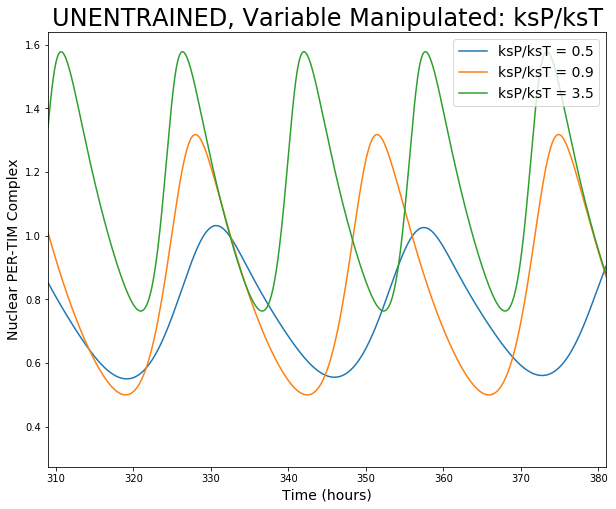

In [41]:
"""
Model of circadian rythm in drosophila
Limit cycle models for circadian rhythms based on transcriptional regulation in Drosophila and Neurospora.
Leloup JC, Gonze D, Goldbeter A. J Biol Rhythms.1999 Dec;14(6):433-48. 10643740, 
"""

import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from scipy import signal
from pylab import *
%matplotlib inline

def find_period(t, x):
    # Find indices for all peaks in the array x
    peaks= signal.find_peaks_cwt(x, np.arange(5,15))
    if len(peaks) <= 3:
        raise ValueError('Your trace have less than three peaks. Choose longer simulation time')
    # Remove first and last peak to avoid transients and incomplete peaks
    internal_peaks = peaks[1:-1]
    # Find periods as difference between times of consecutive peaks
    periods = np.diff(t[internal_peaks])
    # Calculate means of individual periods
    mean_period = np.mean(periods)
    return mean_period

#-----------------------------------------------
# Model parameters
#-----------------------------------------------
vsP=1.1
vmP=1.0
KmP=0.2
KIP=1.0
ksP=0.9
vdP=2.2
KdP=0.2
vsT=1.0
vmT=0.7
KmT=0.2
KIT=1.0
#=============================================================#
#Comment original parameter value
#=============================================================#
#ksT=0.9
VdT = 3.0
KdT=0.2
kdC=0.01
kdN=0.01
k1=0.8
k2=0.2
k3=1.2
k4=0.6
kd=0.01
V1P=8.0
V1T=8.0
V2P=1.0
V2T=1.0
V3P=8.0
V3T=8.0
V4P=1.0
V4T=1.0
K1P=2.0
K1T=2.0
K2P=2.0
K2T=2.0
K3P=2.0
K3T=2.0
K4P=2.0
K4T=2.0
n=4.0

ksP_list = [0.5, 0.9, 3.5]
#=============================================================#
#Make a list of the FRPs per these ksP/ksT values
#=============================================================#
ksP_period_list =[]
for x in range(0,3):
    ksP = ksP_list[x]
    #=============================================================#
    #Set ksT = ksP per assumptions of parallel systems
    #=============================================================#
    ksT=ksP

#-----------------------------------------------
# solve the system dy/dt = f(y, t)
#-----------------------------------------------
    def df_light(y, t):
    #assign input vector,y to variables of the model
        MP  = y[0]
        P0 = y[1]
        P1 = y[2]
        P2 = y[3]
        MT = y[4]
        T0 = y[5]
        T1 = y[6]
        T2 = y[7]
        C  = y[8]
        CN = y[9]
    #-----------------------------------------------
    # Fine right hand side of differential equations
    #-----------------------------------------------
        dMP = vsP*KIP**n/(KIP**n+CN**n) - (vmP*MP/(KmP+MP)+kd*MP)
        dP0 = ksP*MP + V2P*P1/(K2P+P1) -(V1P*P0/(K1P+P0)+kd*P0)
        dP1 = V1P*P0/(K1P+P0) + V4P*P2/(K4P+P2) - (V2P*P1/(K2P+P1)+V3P*P1/(K3P+P1)+kd*P1)
        dP2 = V3P*P1/(K3P+P1)+k4*C-(V4P*P2/(K4P+P2)+k3*P2*T2+vdP*P2/(KdP+P2)+kd*P2)
        dMT = vsT*KIT**n/(KIT**n+CN**n)-(vmT*MT/(KmT+MT)+kd*MT)
        dT0 = ksT*MT+V2T*T1/(K2T+T1)-(V1T*T0/(K1T+T0)+kd*T0)
        dT1 = V1T*T0/(K1T+T0)+V4T*T2/(K4T+T2)-(V2T*T1/(K2T+T1)+V3T*T1/(K3T+T1)+kd*T1)
        dT2 = V3T*T1/(K3T+T1)+k4*C-(V4T*T2/(K4T+T2)+k3*P2*T2+VdT*T2/(KdT+T2)+kd*T2)
        dC  = k3*P2*T2+k2*CN-(k4*C+k1*C+kdC*C)
        dCN = k1*C-(k2*CN+kdN*CN)
   
        return [dMP, dP0, dP1, dP2, dMT, dT0, dT1, dT2, dC, dCN]


#-----------------------------------------------
# Choose numerical parameters
#-----------------------------------------------
    T = 400.
    dt=0.05
    nsteps=int(T/dt)
    t  = np.linspace(0, T, nsteps) 
#-----------------------------------------------
# Choose initial conditions
#-----------------------------------------------
    y0= [0.0614368,0.0169928, 0.0141356, 0.0614368, 0.0860342, 0.0217261, 0.0213384, 0.0145428, 0.207614, 1.34728  ]       
#-----------------------------------------------
# solve system of differential equations
#-----------------------------------------------
    soln = odeint(df_light, y0, t)
    MP = soln[:,0]
    P0 = soln[:,1]
    P1 = soln[:,2]
    P2 = soln[:,3]
    MT = soln[:,4]
    T0 = soln[:,5]
    T1 = soln[:,6]
    T2 = soln[:,7]
    C  = soln[:,8]
    CN = soln[:,9]
    
    PT = P0+P1+P2+C+CN
    
    #=============================================================#
    #Find the FRPs, add them to the period list, then print this list per ksP/ksT value
    #=============================================================#
    period = find_period(t, CN)
    ksP_period_list.append(period)
    print('ksP = ',ksP,' period = ', period)
    #**************************Smallest and Largest period values printed used to make graph 5*********

#-----------------------------------------------
# plot results
#-----------------------------------------------
    plt.figure(1, figsize=(10,8))
    plt. plot(t, CN, label = "ksP/ksT = "+str(ksP_list[x]))
    plt.xlabel('Time (hours)', fontsize = 14)
    plt.ylabel('Nuclear PER-TIM Complex', fontsize = 14)
    plt.legend(loc=1, fontsize = 14)
    plt.xlim(309,381)
    plt.title("UNENTRAINED, Variable Manipulated: ksP/ksT", fontsize = 24)   
plt.show()


## 2.h. Entrained ksP/ksT

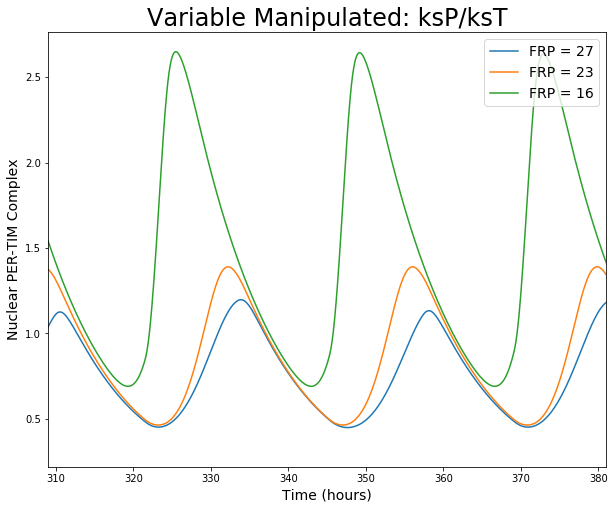

In [38]:
"""
Model of circadian rythm in drosophila
Limit cycle models for circadian rhythms based on transcriptional regulation in Drosophila and Neurospora.
Leloup JC, Gonze D, Goldbeter A. J Biol Rhythms.1999 Dec;14(6):433-48. 10643740, 
"""

import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from scipy import signal
from pylab import *
%matplotlib inline

#-----------------------------------------------
# Model parameters
#-----------------------------------------------
vsP=1.1
vmP=1.0
KmP=0.2
KIP=1.0
ksP=0.9
vdP=2.2
KdP=0.2
vsT=1.0
vmT=0.7
KmT=0.2
KIT=1.0
#=============================================================#
#Comment the original manipulated parameter value
#=============================================================#
#ksT=0.9
#=============================================================#
#Comment original VdT value
#=============================================================#
#VdT = 3.0
KdT=0.2
kdC=0.01
kdN=0.01
k1=0.8
k2=0.2
k3=1.2
k4=0.6
kd=0.01
V1P=8.0
V1T=8.0
V2P=1.0
V2T=1.0
V3P=8.0
V3T=8.0
V4P=1.0
V4T=1.0
K1P=2.0
K1T=2.0
K2P=2.0
K2T=2.0
K3P=2.0
K3T=2.0
K4P=2.0
K4T=2.0
n=4.0

ksP_list = [0.5, 0.9, 3.5]
#=============================================================#
#Make legend of FRPs from unentrained code (2.g.) per ksP/ksT value
#=============================================================#
mylegend = ['FRP = 27', 'FRP = 23', 'FRP = 16']
#**************************Smallest and Largest values above used to make graph 5*********

for x in range(0,3):
    ksP = ksP_list[x]
    ksT=ksP
    
#-----------------------------------------------
# solve the system dy/dt = f(y, t)
#-----------------------------------------------
    def df_light(y, t):
    #assign input vector,y to variables of the model
        MP  = y[0]
        P0 = y[1]
        P1 = y[2]
        P2 = y[3]
        MT = y[4]
        T0 = y[5]
        T1 = y[6]
        T2 = y[7]
        C  = y[8]
        CN = y[9]
    #-----------------------------------------------
    # Fine right hand side of differential equations
    #-----------------------------------------------
        dMP = vsP*KIP**n/(KIP**n+CN**n) - (vmP*MP/(KmP+MP)+kd*MP)
        dP0 = ksP*MP + V2P*P1/(K2P+P1) -(V1P*P0/(K1P+P0)+kd*P0)
        dP1 = V1P*P0/(K1P+P0) + V4P*P2/(K4P+P2) - (V2P*P1/(K2P+P1)+V3P*P1/(K3P+P1)+kd*P1)
        dP2 = V3P*P1/(K3P+P1)+k4*C-(V4P*P2/(K4P+P2)+k3*P2*T2+vdP*P2/(KdP+P2)+kd*P2)
        dMT = vsT*KIT**n/(KIT**n+CN**n)-(vmT*MT/(KmT+MT)+kd*MT)
        dT0 = ksT*MT+V2T*T1/(K2T+T1)-(V1T*T0/(K1T+T0)+kd*T0)
        dT1 = V1T*T0/(K1T+T0)+V4T*T2/(K4T+T2)-(V2T*T1/(K2T+T1)+V3T*T1/(K3T+T1)+kd*T1)
        #=============================================================#
        #Implement the square wave
        #=============================================================#
        dT2 = V3T*T1/(K3T+T1)+k4*C-(V4T*T2/(K4T+T2)+k3*P2*T2+(1.5*signal.square((2 * np.pi * 0.042 * t))+4.5)*T2/(KdT+T2)+kd*T2)
        dC  = k3*P2*T2+k2*CN-(k4*C+k1*C+kdC*C)
        dCN = k1*C-(k2*CN+kdN*CN)
   
        return [dMP, dP0, dP1, dP2, dMT, dT0, dT1, dT2, dC, dCN]

#-----------------------------------------------
# Choose numerical parameters
#-----------------------------------------------
    T = 400.
    dt=0.05
    nsteps=int(T/dt)
    t  = np.linspace(0, T, nsteps) 
#-----------------------------------------------
# Choose initial conditions
#-----------------------------------------------
    y0= [0.0614368,0.0169928, 0.0141356, 0.0614368, 0.0860342, 0.0217261, 0.0213384, 0.0145428, 0.207614, 1.34728  ]       
#-----------------------------------------------
# solve system of differential equations
#-----------------------------------------------
    soln = odeint(df_light, y0, t)
    MP = soln[:,0]
    P0 = soln[:,1]
    P1 = soln[:,2]
    P2 = soln[:,3]
    MT = soln[:,4]
    T0 = soln[:,5]
    T1 = soln[:,6]
    T2 = soln[:,7]
    C  = soln[:,8]
    CN = soln[:,9]
    
    PT = P0+P1+P2+C+CN

#-----------------------------------------------
# plot results
#-----------------------------------------------
    plt.figure(1, figsize=(10,8))
    #=============================================================#
    #Label the curves with their FRP values (from 2.g.)
    #=============================================================#
    plt. plot(t, CN, label = mylegend[x])
    plt.xlabel('Time (hours)', fontsize = 14)
    plt.ylabel('Nuclear PER-TIM Complex', fontsize = 14)
    plt.legend(loc=1, fontsize = 14)
    plt.xlim(309,381)
    plt.title("Variable Manipulated: ksP/ksT", fontsize = 24)    
plt.show()


# 3. Figure 5

To make Figure 5, we used an Excel spreadsheet. 

To make the Figure, you need 2 columns and 5 rows. Each variable (control spider, ksP/ksT, k1, k2, k3) had their own row. 

One of the two columns is for the smallest FRP value. The other is for the largest FRP value (per variable). 

The values to be used are indicated in the code with asterisks. These values are printed originally as the period list resulting from the unentrained runs of the code. Additionally, these period values printed are incorporated into the entrained code, used as labels to identify the curves in the graphs produced. 

For ease of finding these variables, we have indicated them where they are printed in the unentrained code and where they are written as a label in the entrained code (rounded to 2 decimal points). 